In [1]:
# Step 1: Make the .kaggle directory
!mkdir -p ~/.kaggle

# Step 2: Move the kaggle.json file (upload it first if you're in Colab)
!cp kaggle.json ~/.kaggle/

# Step 3: Set the correct permissions
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download the dataset (note the correct syntax: no ~ and use '--force' if needed)
!kaggle datasets download -d salader/dogs-vs-cats

# Step 5: Unzip the dataset
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: dogs_vs_cats/train/dogs/dog.4419.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.442.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4420.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4421.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4422.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4424.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4425.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4426.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4427.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4431.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4433.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4436.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4438.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4439.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.444.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4440.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4441.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4442.jpg  
  inflating: do

In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16


In [4]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
conv_base.trainable = False

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [9]:
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/dogs_vs_cats/train',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    '/content/dogs_vs_cats/test',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.8288 - loss: 0.3827

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 171s 259ms/step - accuracy: 0.8289 - loss: 0.3826 - val_accuracy: 0.9108 - val_loss: 0.2122
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 261ms/step - accuracy: 0.8966 - loss: 0.2407 - val_accuracy: 0.9072 - val_loss: 0.2052
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 159s 255ms/step - accuracy: 0.9047 - loss: 0.2183 - val_accuracy: 0.9144 - val_loss: 0.2045
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 259ms/step - accuracy: 0.9117 - loss: 0.2021 - val_accuracy: 0.9192 - val_loss: 0.1910
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.9155 - loss: 0.1989 - val_accuracy: 0.9170 - val_loss: 0.1982
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 252ms/step - accuracy: 0.9188 - loss: 0.1940 - val_accuracy: 0.8918 - val_loss: 0.2511
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 252ms/step - accuracy: 0.9194 - loss: 0.1845 - val_accuracy: 0.9208 - val_loss: 0.1908
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 157s 251ms/step - accuracy: 0.9275 - loss: 0.17

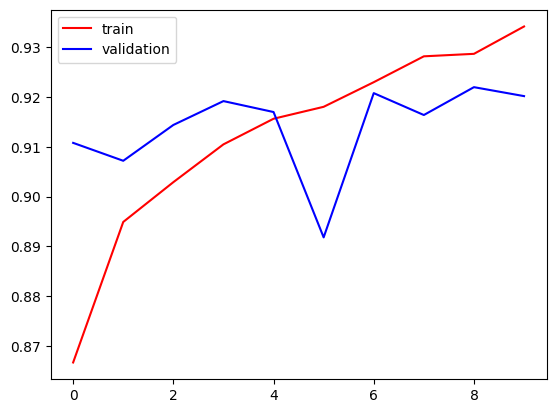

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

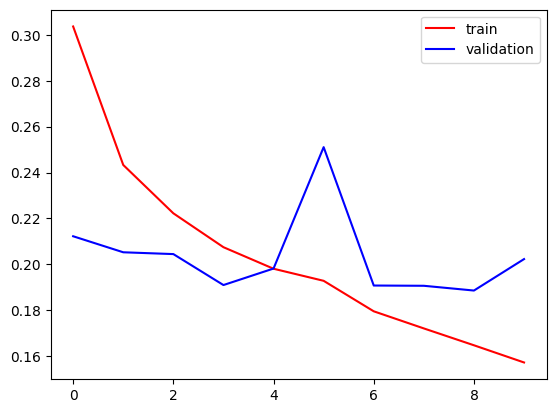

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()